In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_robot_status_diff(basedir):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    data = []
    labels = []
    
    for dir in os.listdir(basedir):
        if not os.path.isdir(os.path.join(basedir, dir)):
            continue
        
        df = pd.read_csv(os.path.join(basedir, dir, 'robot_status.csv'))
        df["diff"] = abs(df["charging"] - df["operating"])
        
        ax1.plot(df["epoch"], df["diff"], label=dir)
        data.append(df["diff"])
        labels.append(dir)
        
    ax2.boxplot(data, showmeans=True, meanline=True,
            medianprops=dict(color='white'))
    ax2.set_xticklabels(labels)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    fig.legend()
    fig.show()
        
        

In [3]:
def plot_robot_status(basedir):
    fig, ax = plt.subplots()
    
    for dir in os.listdir(basedir):
        if not os.path.isdir(os.path.join(basedir, dir)):
            continue
        
        df = pd.read_csv(os.path.join(basedir, dir, 'robot_status.csv'))
        ax.plot(df["epoch"], df["charging"], label=dir+"_charging")
        ax.plot(df["epoch"], df["operating"], label=dir+"_operating")        
    
    fig.set_figheight(10)
    fig.set_figwidth(20)
    fig.legend()
    fig.show()

In [17]:
def plot_robot_operation_time(basedir):
    fig, ax = plt.subplots()
    
    for dir in sorted(os.listdir(basedir)):
        if not os.path.isdir(os.path.join(basedir, dir)):
            continue
        
        df = pd.read_csv(os.path.join(basedir, dir, 'simulation_stats.csv'))
        
        cum = 0
        for i in range(int(df["n_robot"])):
            cum += df["robot_" + str(i) + "_operation_time"]
        
        ax.barh(dir, cum)
        ax.text(cum, dir, str(int(cum)))

    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.legend()
    fig.show()

/tmp/ipykernel_294693/3431237549.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_294693/3105290062.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_294693/2868748246.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  for i in range(int(df["n_robot"])):
/tmp/ipykernel_294693/2868748246.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.text(cum, dir, str(int(cum)))
/tmp/ipykernel_294693/2868748246.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  for i in range(int(df["n_robot"])):
/tmp/ipykernel_294693/2868748246.py:15: FutureWarning: Calling int on a single element Series is d

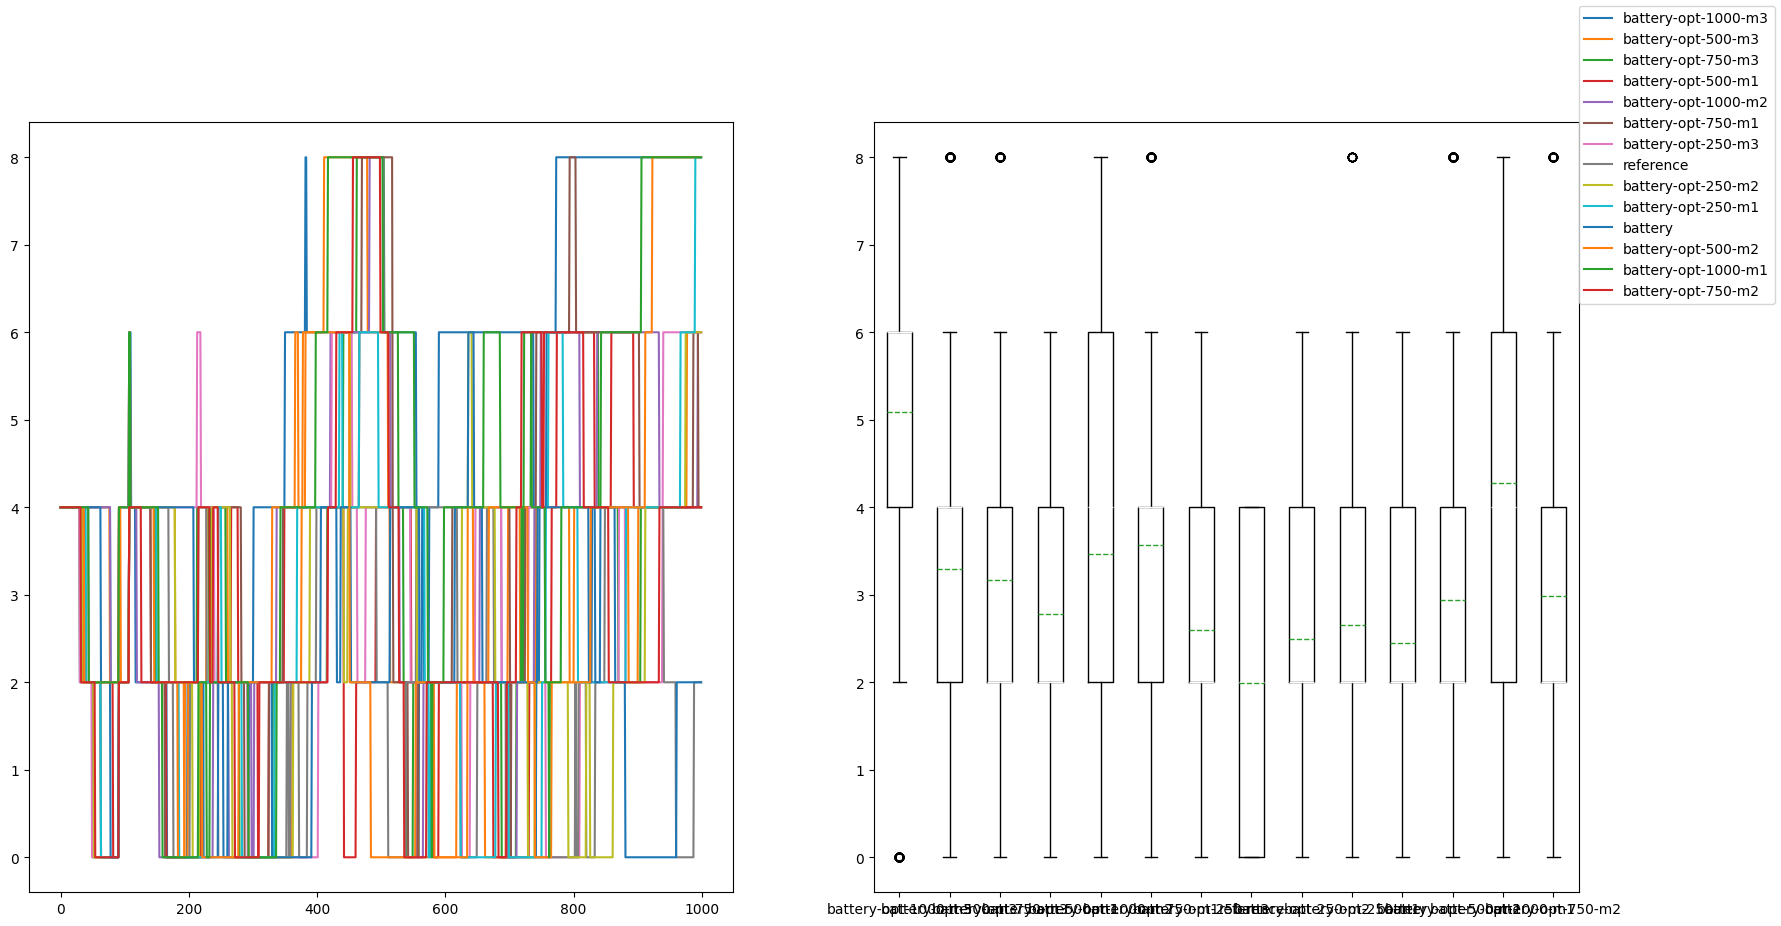

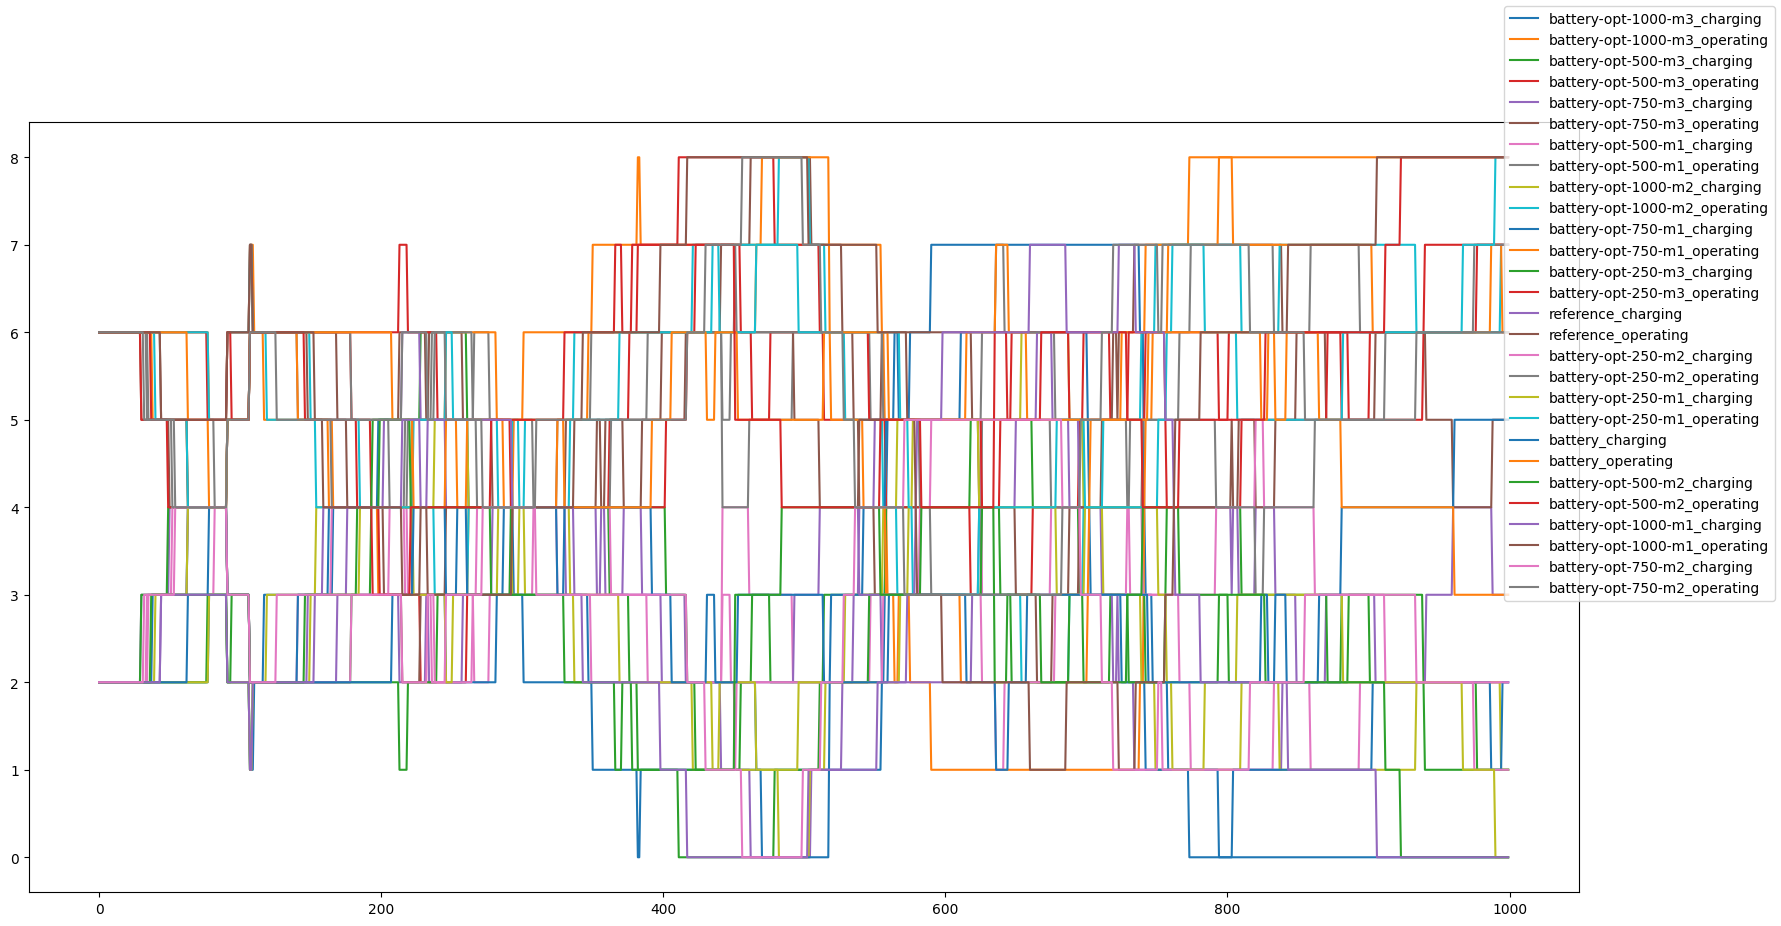

/home/stefano/Desktop/Github/Plebiscito-robot/venv/lib/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


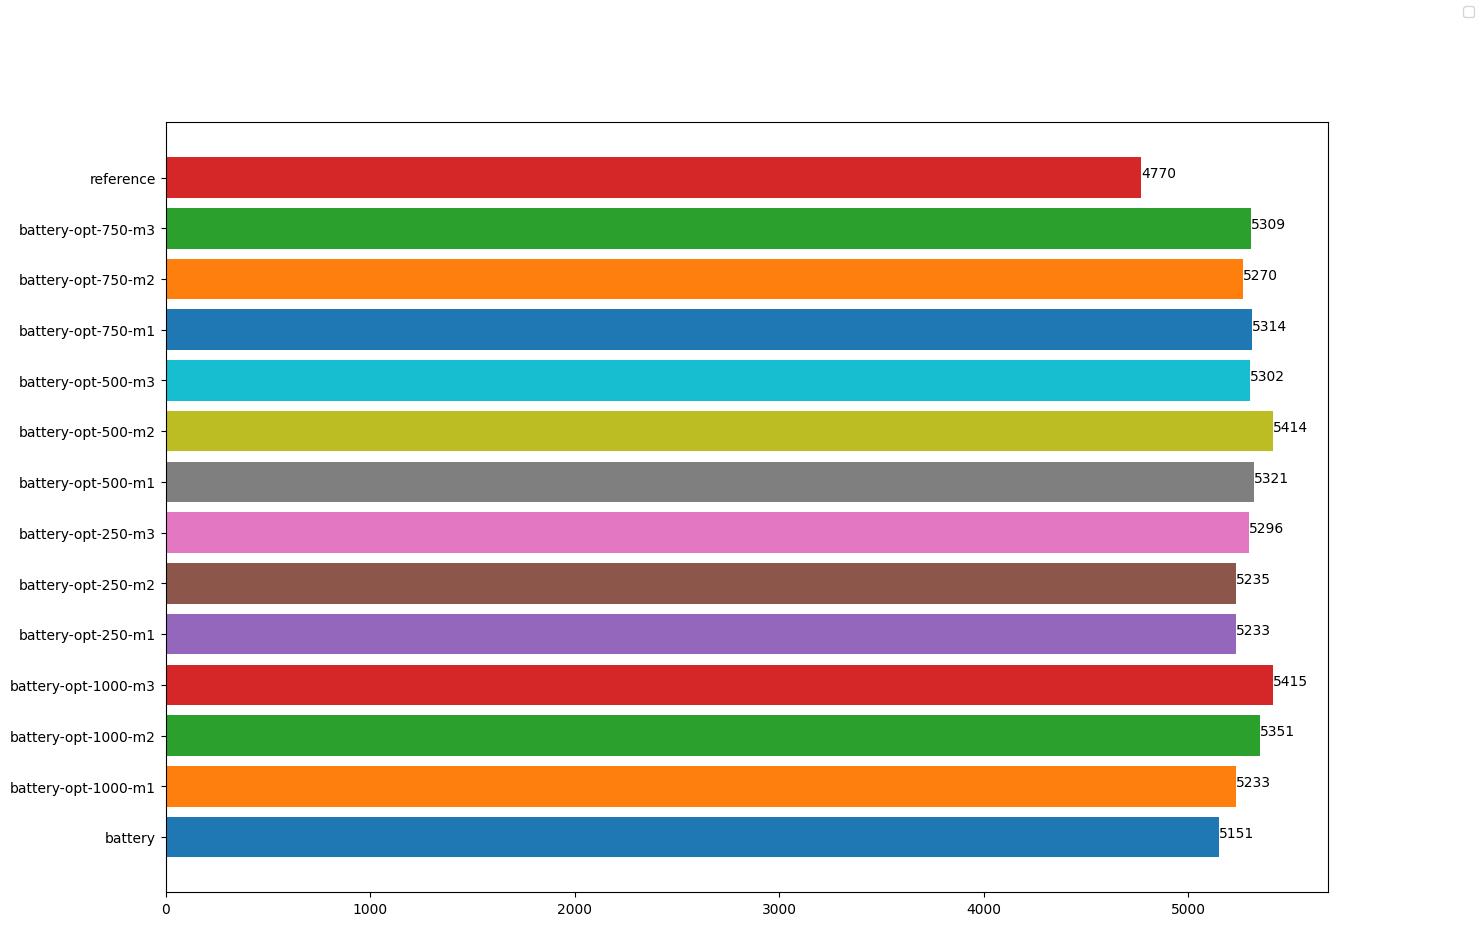

In [33]:
basedir = "../res"

plot_robot_status_diff(basedir)
plot_robot_status(basedir)
plot_robot_operation_time(basedir)
